In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')

# Load and Analyze the data

In [3]:
df = pd.read_csv('Cellphone.csv')

In [4]:
df.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [5]:
df.shape

(161, 14)

In [6]:
df.describe()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,675.559006,2215.596273,621.465839,170.426087,5.209938,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739
std,410.851583,768.187171,1546.618517,92.888612,1.509953,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564
min,10.000000,614.000000,10.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,237.000000,1734.000000,37.000000,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,774.000000,2258.000000,106.000000,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,1026.000000,2744.000000,382.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,1339.000000,4361.000000,9807.000000,753.000000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


# Explore the data

## Checking each category how it reflect the Price

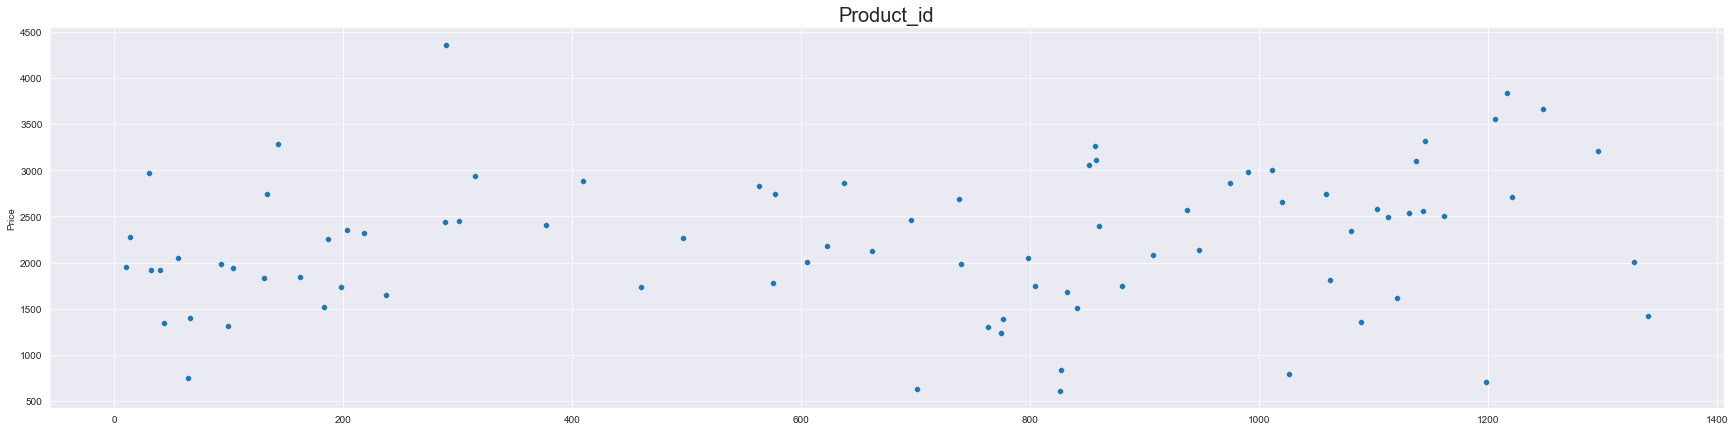

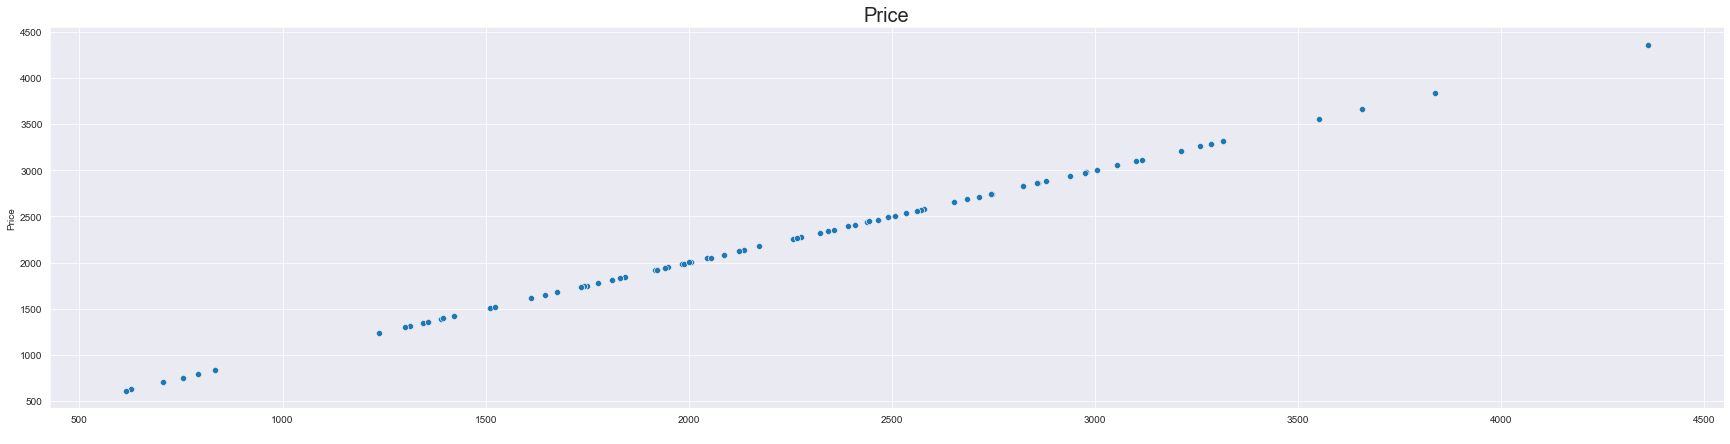

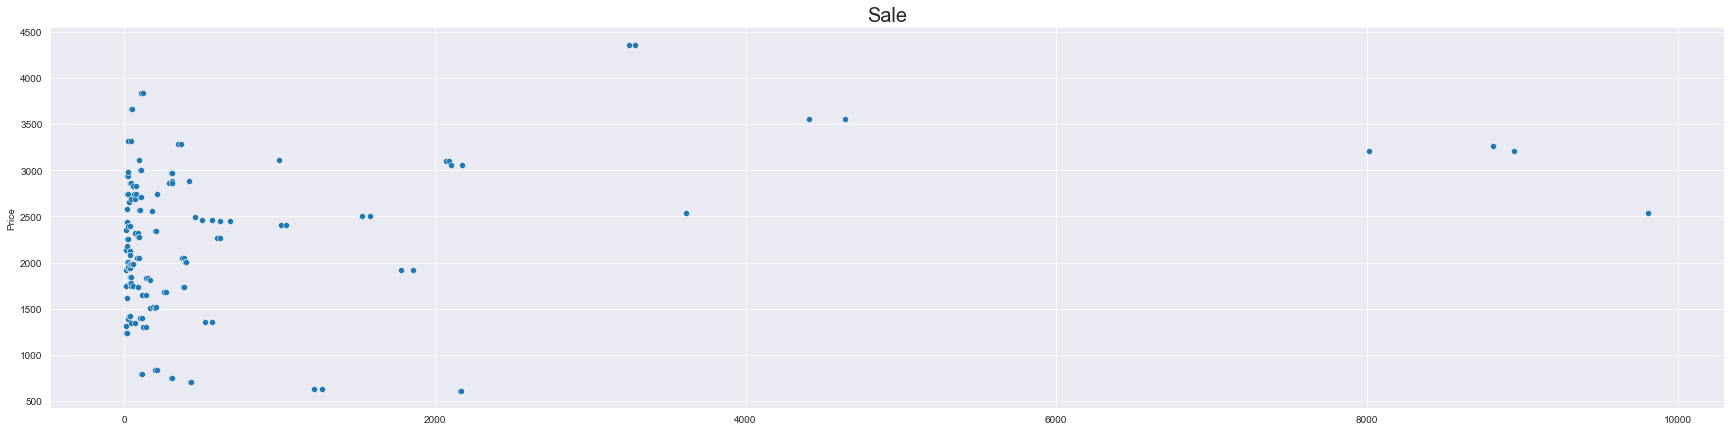

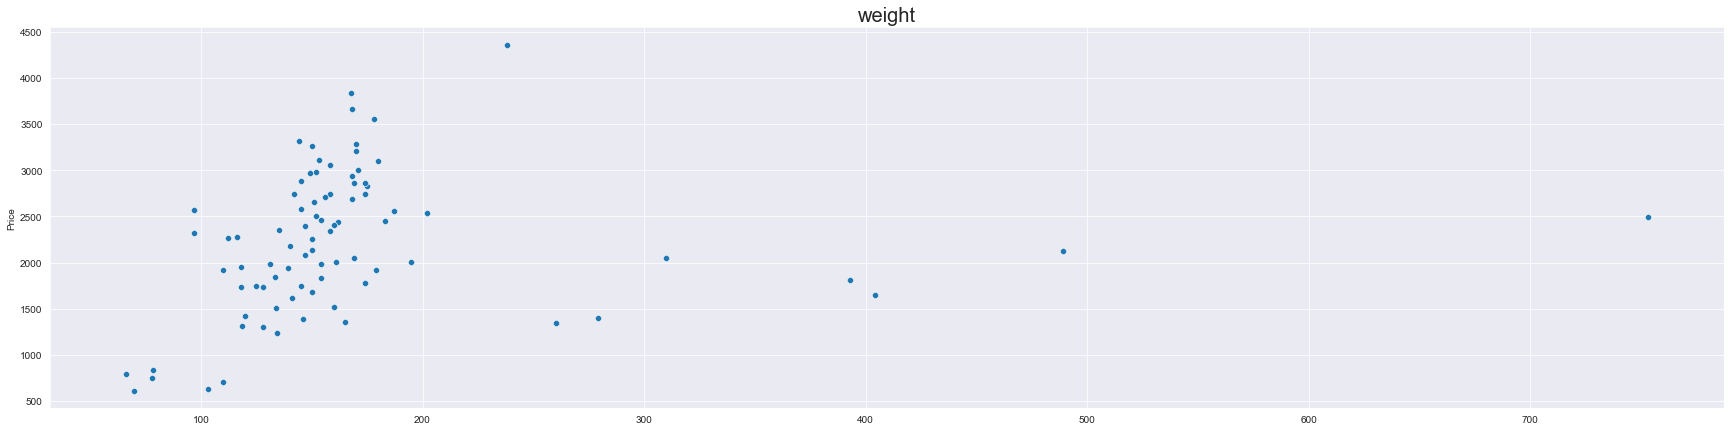

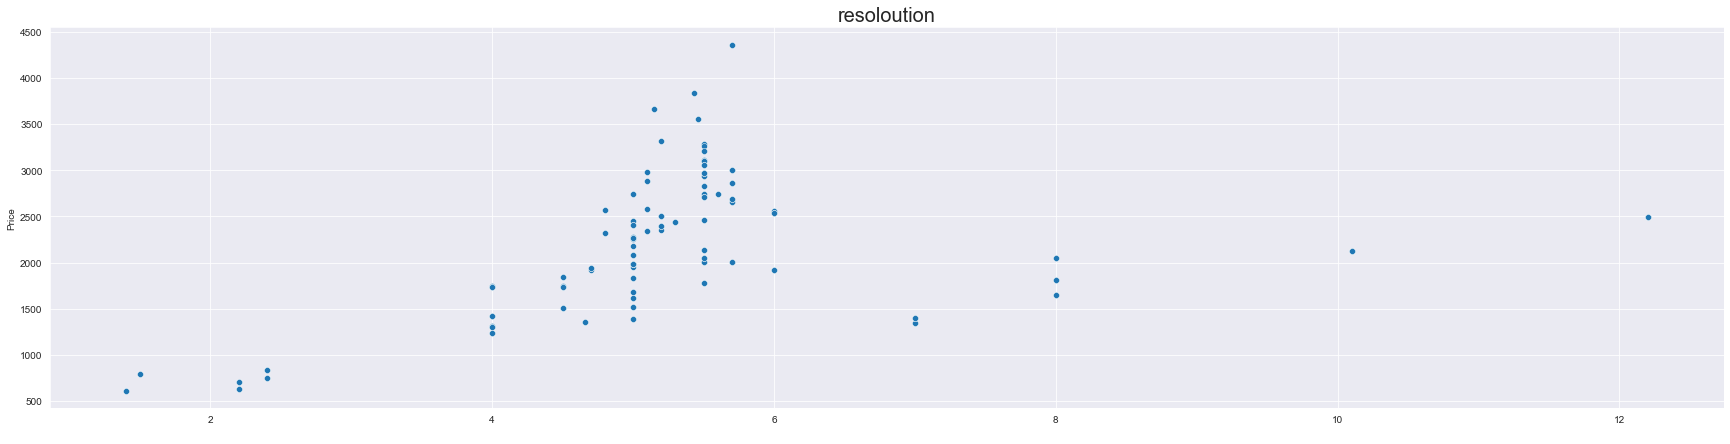

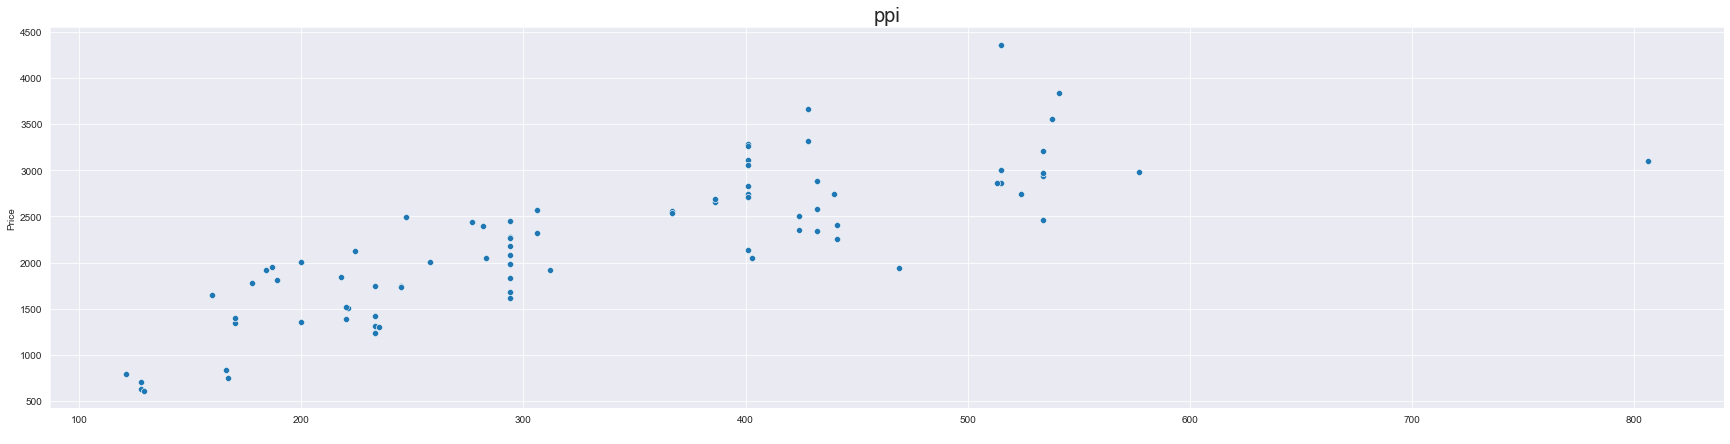

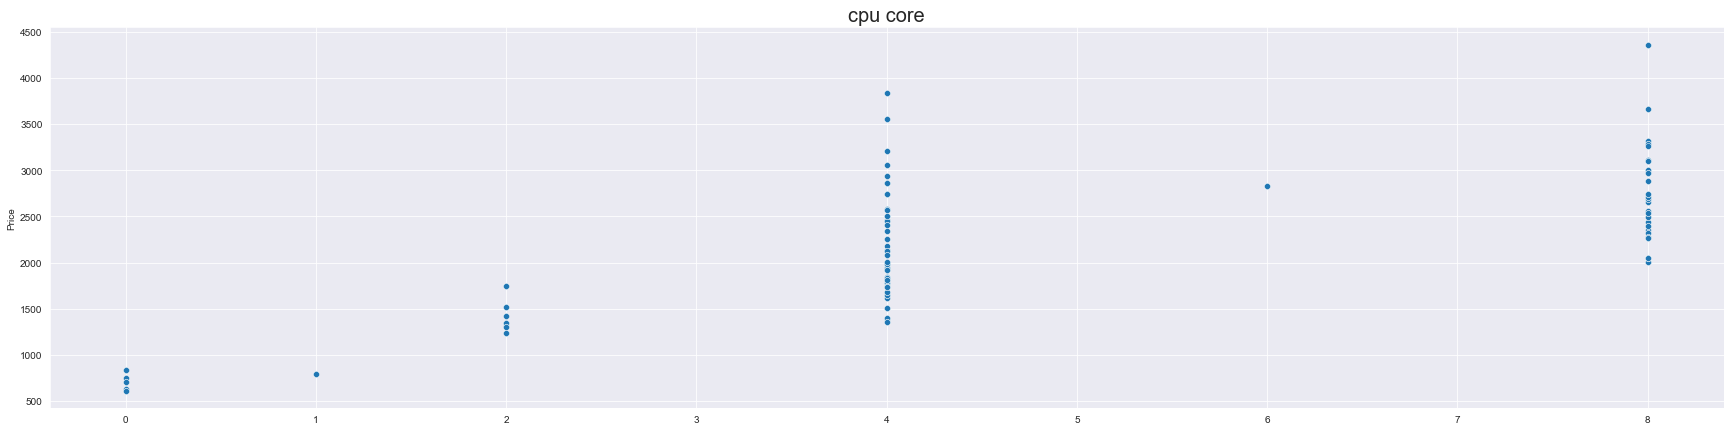

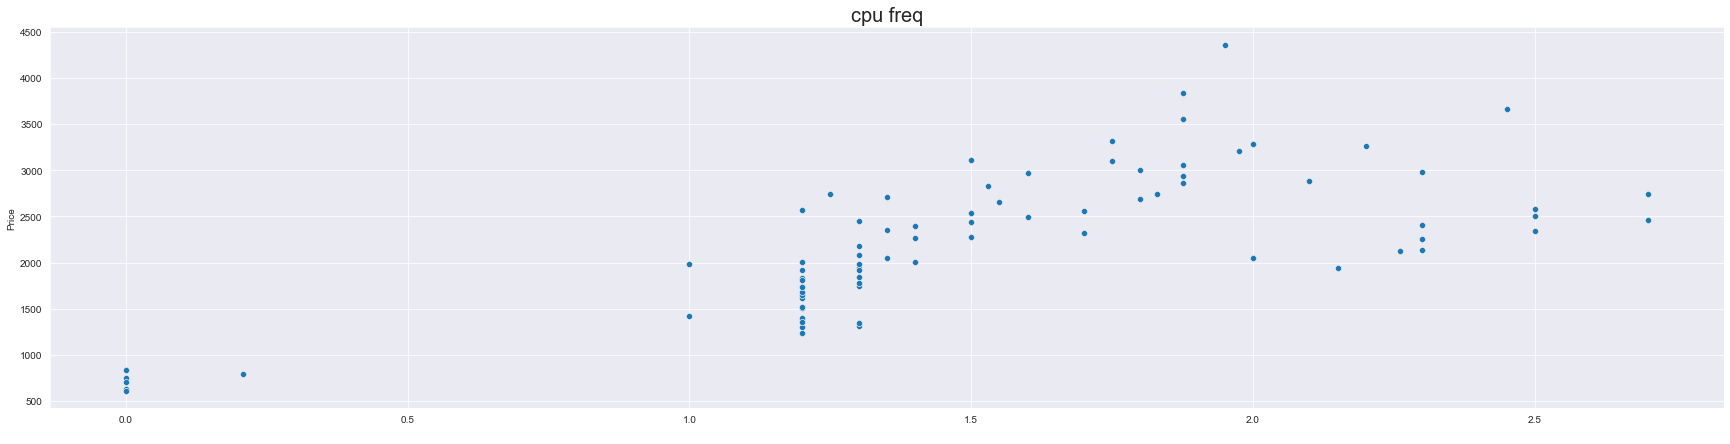

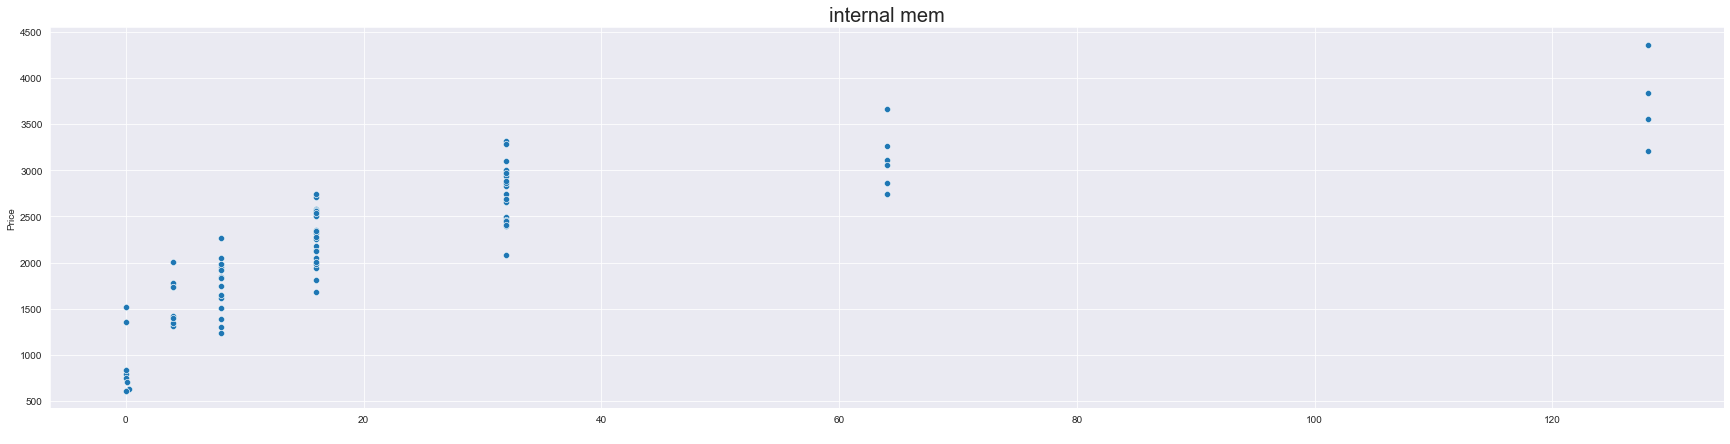

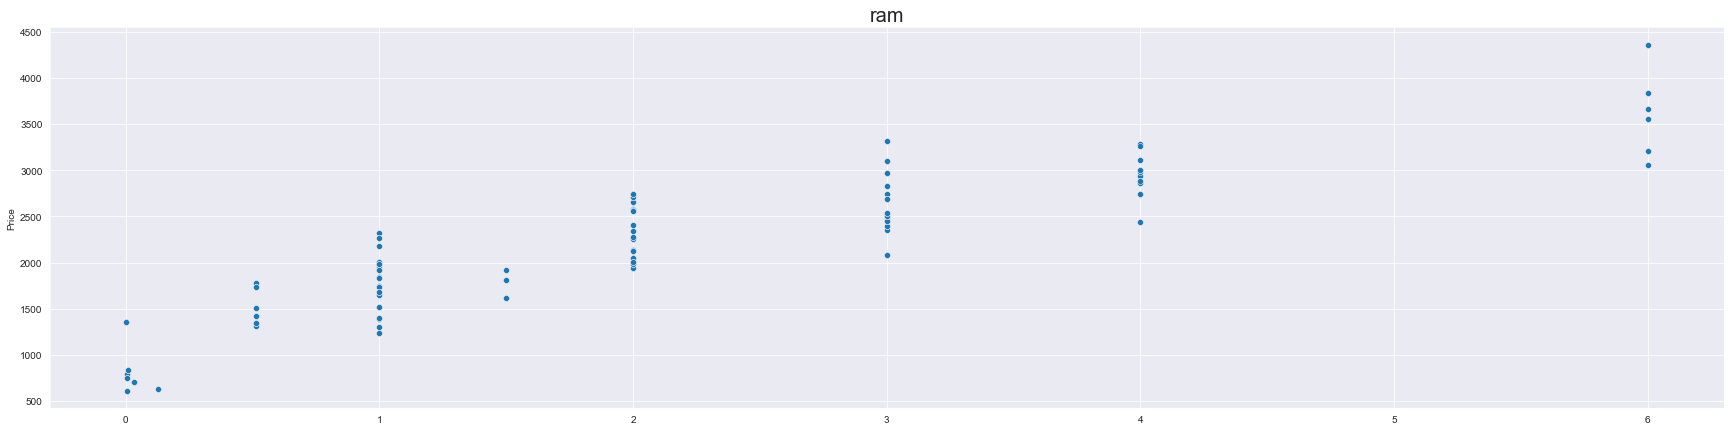

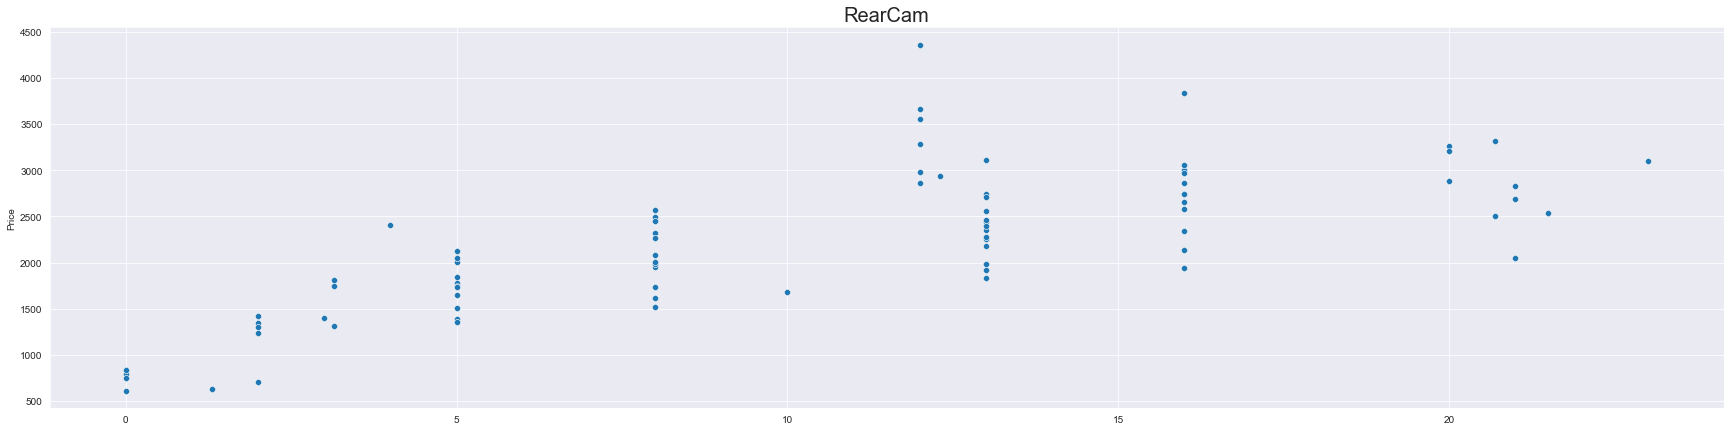

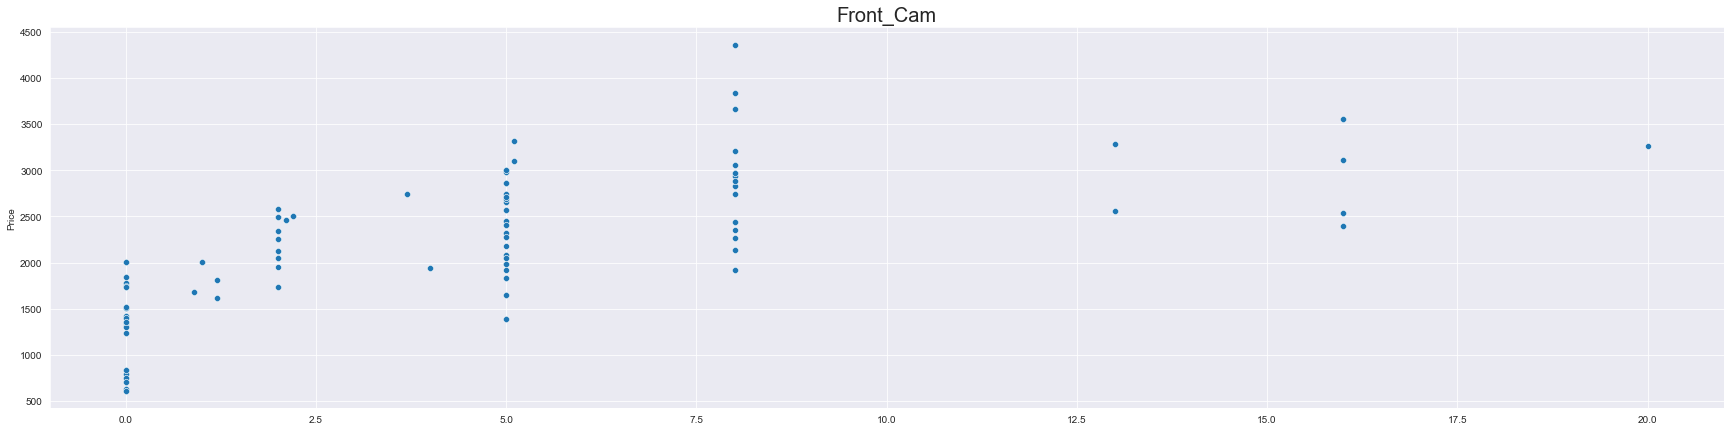

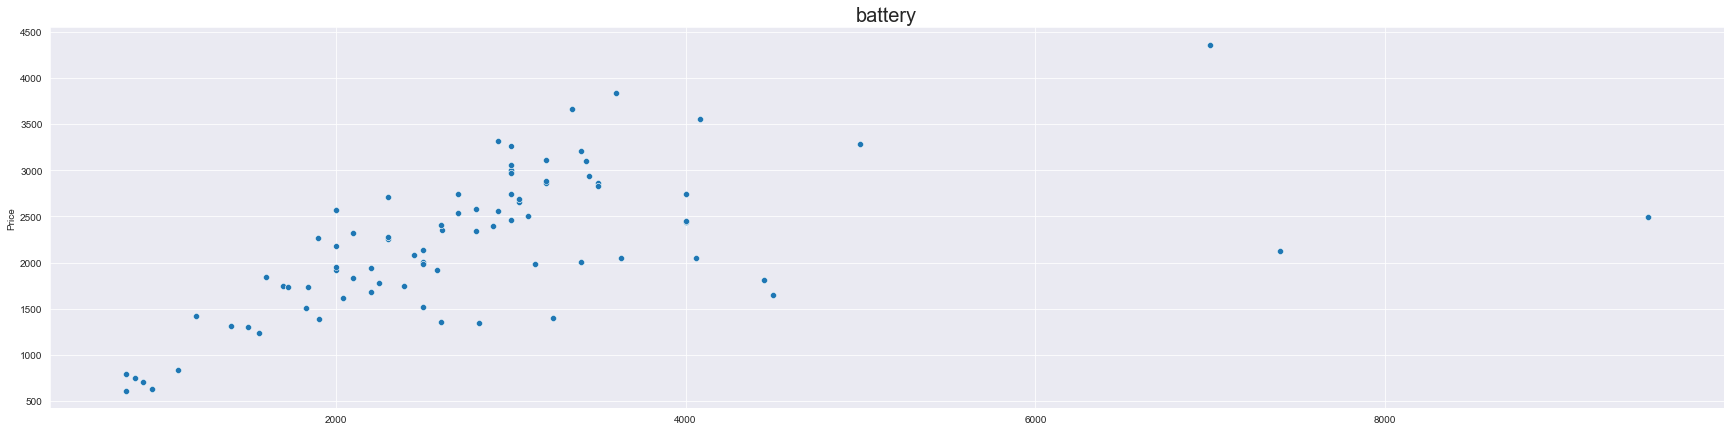

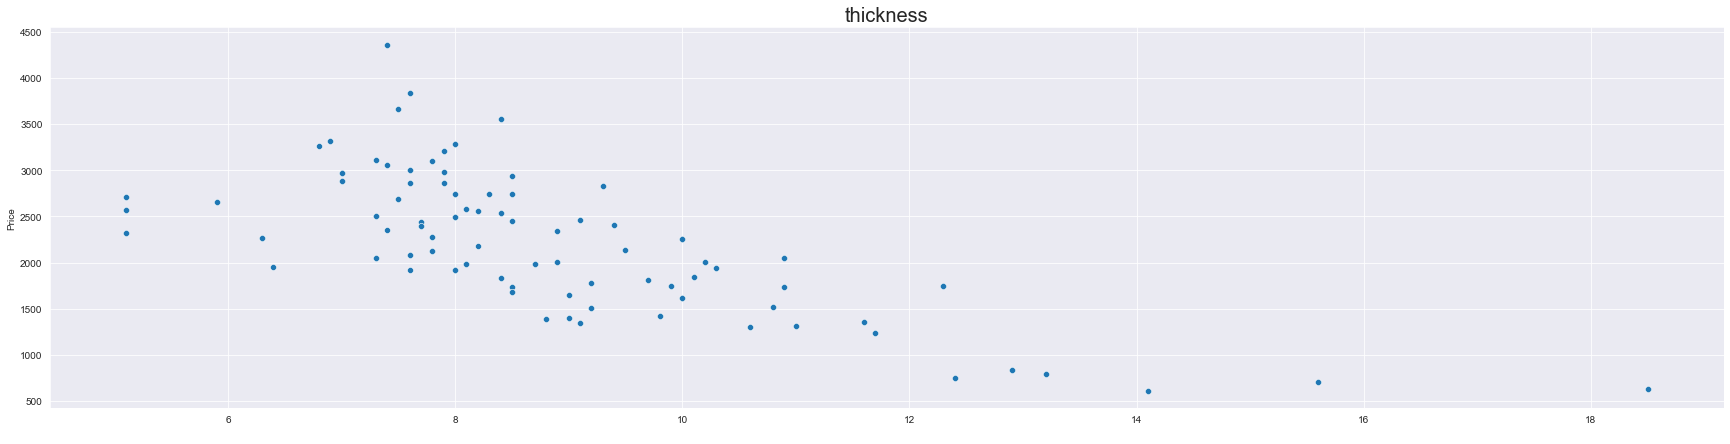

In [8]:
data_target = df["Price"]
# Scatter plot between all the independent variables and dependent variable
for col in df.columns:
    plt.figure(figsize = (30,7))
    sns.scatterplot(data = df, x = col, y = data_target)
    plt.xlabel(" ")
    plt.title(col,size = 20)
    plt.show()

## Correlation Matrix

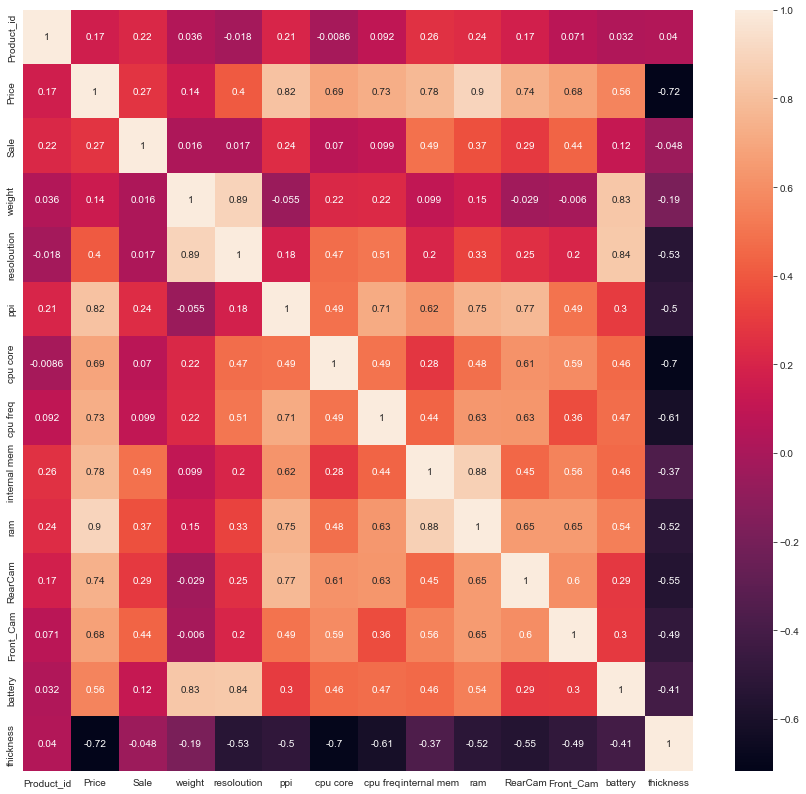

In [9]:
fig,ax=plt.subplots(figsize=(15,14))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [10]:
##We can see some categories have high correlation between them

C:\Users\Tevet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


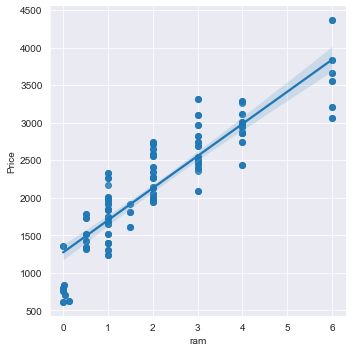

In [11]:
## Bigger ram affects the price of the cellphone the most
sns.lmplot('ram','Price',data = df )

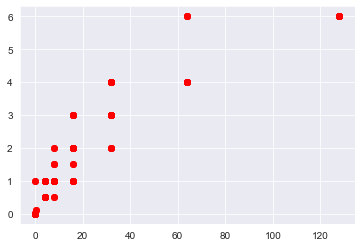

In [12]:
##As the ram getting higher so do the internal memory
plt.scatter(df['internal mem'],df['ram'],color = 'r')

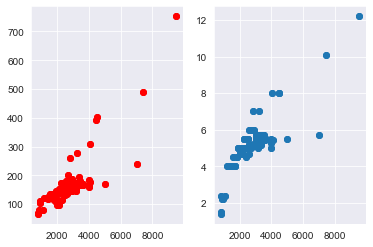

In [13]:
##When the battery is larger so the Cellphone getting heavier and its resoloution becoming better
plt.subplot(1,2,1)
plt.scatter(df['battery'], df['weight'],c = 'r') 
plt.subplot(1,2,2)
plt.scatter(df['battery'], df['resoloution']);

In [15]:
## After analyzing we can see that there is correlations between few parameters like : 
## Ram - internal mem , battery - weight - resoloution.
## Ram is the category that affect the price of the cellphone the most.

## Splitting the data to train and test

In [54]:
## First we drop unnecessary columns
df = df.drop('Product_id',axis = 1)

In [55]:
X = df.drop('Price',axis = 1)
y= df['Price']

In [56]:
X

,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,10,135.0,5.20,424,8,1.350,16.0,3.000,13.00,8.0,2610,7.4
1,10,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
2,10,110.0,4.70,312,4,1.200,8.0,1.500,13.00,5.0,2000,7.6
3,11,118.5,4.00,233,2,1.300,4.0,0.512,3.15,0.0,1400,11.0
4,11,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...
156,4638,178.0,5.46,538,4,1.875,128.0,6.000,12.00,16.0,4080,8.4
157,8016,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9
158,8809,150.0,5.50,401,8,2.200,64.0,4.000,20.00,20.0,3000,6.8
159,8946,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9


In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=0)

In [59]:
## Transforming Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [74]:
print(X_train)

[[0.00163315 0.12227074 0.33333333 ... 0.125      0.17241379 0.36567164]
 [0.0157191  0.09898108 0.28703704 ... 0.         0.1183908  0.30597015]
 [0.00857405 0.12663755 0.37962963 ... 1.         0.27586207 0.1641791 ]
 ...
 [0.00734919 0.35516739 0.61111111 ... 0.125      0.37471264 0.1641791 ]
 [0.03643973 0.15138282 0.37962963 ... 0.8125     0.48275862 0.21641791]
 [0.00316423 0.11353712 0.35185185 ... 0.31875    0.24482759 0.13432836]]


## Predict the price using Linear Regression

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
lm = LinearRegression()

In [65]:
lm.fit(X_train,y_train)

LinearRegression()

In [66]:
lm.coef_

array([-210.87796801, -297.2325969 , -757.25234562,  644.86826284,
        398.8927305 ,  337.45415637,  851.07583505,  419.25018031,
        157.37881049,   94.14755506, 1148.50927908, -871.50883068])

In [67]:
lm.intercept_

1367.5946251824198

In [68]:
pred_test = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

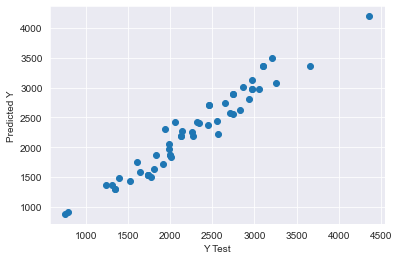

In [69]:
plt.scatter(y_test,pred_test)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Calculating the : MAE , MSE , RMSE

In [70]:
from sklearn import metrics
print('MAE: ',metrics.mean_absolute_error(y_test,pred_test))
print('MSE: ',metrics.mean_squared_error(y_test,pred_test))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,pred_test)))

MAE:  145.23814801480412
MSE:  29383.71895341697
RMSE:  171.41679892419228


## Coeffecient table

In [72]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients['Coeffecient'] = coeffecients['Coeffecient'].round()
coeffecients

,Coeffecient
Sale,-211.0
weight,-297.0
resoloution,-757.0
ppi,645.0
cpu core,399.0
cpu freq,337.0
internal mem,851.0
ram,419.0
RearCam,157.0
Front_Cam,94.0


# Prediction score

In [73]:
from sklearn.metrics import r2_score
print("Accuracy: {:.2f}%".format(r2_score(y_test, pred_test)*100))

Accuracy: 94.03%


In [ ]:
##In conclusion Mobile price depends on various factors such as:
##resolution, brand, size, weight, imaging quality, RAM, battery and cpu power.